In [1]:
# Import scikit-learn dataset library
import numpy as np
import pandas as pd

from sklearn import datasets

# Load dataset
iris = datasets.load_iris()

In [2]:
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [3]:
print(iris.target[0:5])

[0 0 0 0 0]


In [7]:
# Creating a DataFraemwork of given iris dataset
import pandas as pd
data=pd.DataFrame({
    'Sepal length':iris.data[1,0],
    'Sepal width':iris.data[:,1],
    'Petal length':iris.data[:,2],
    'Petal width':iris.data[:,3],
    'Species':iris.target
})
data.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,4.9,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.9,3.2,1.3,0.2,0
3,4.9,3.1,1.5,0.2,0
4,4.9,3.6,1.4,0.2,0


In [8]:
data.shape

(150, 5)

In [13]:
# Import train_test_split function
from  sklearn.model_selection import train_test_split

X=data[['Sepal length','Sepal width','Petal length','Petal width']] # Features
y=data['Species'] # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [14]:
X_train.shape

(105, 4)

In [15]:
X_test.shape

(45, 4)

In [16]:
y_train.shape

(105,)

In [17]:
y_test.shape

(45,)

#### Import Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred


array([2, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0,
       0])

In [21]:
Train_Score = clf.score(X_train,y_train)
Train_Score

1.0

In [22]:
Test_score = clf.score(X_test,y_test)
Test_score

0.9777777777777777

In [23]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


You can also make a prediction for a asingle item, for example:
    
    1. sepal length = 3
    2. sepal width = 5
    3. petal length = 4
    4. petal width = 2
    
    Now you can predict which type of flower it is.

In [26]:
clf.predict([[3, 5, 4, 2]])

array([2])

Here, 2 indicates the flower type Virginica.

Finding Important features in  Scikit learn


In [30]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.467706
petal width (cm)     0.461372
sepal width (cm)     0.070921
sepal length (cm)    0.000000
dtype: float64

### Visualization

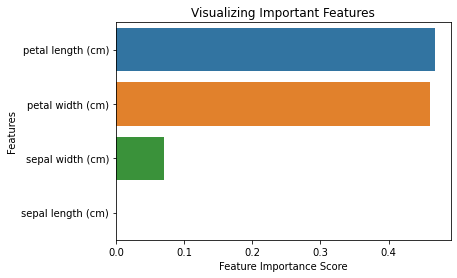

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [33]:
# Import train_test_split function
from  sklearn.model_selection import train_test_split

X=data[['Sepal length','Petal length','Petal width']] # Removed Feature "sepal width"
y=data['Species'] # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [35]:
X_test.shape

(105, 3)

In [36]:
X_train.shape

(45, 3)

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train,y_train)

# Prediction on test set y_pred=clf.predict(X_test)
y_pred=clf.predict(X_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


In [28]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [29]:
X,Y = load_iris(return_X_y=True)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=0)

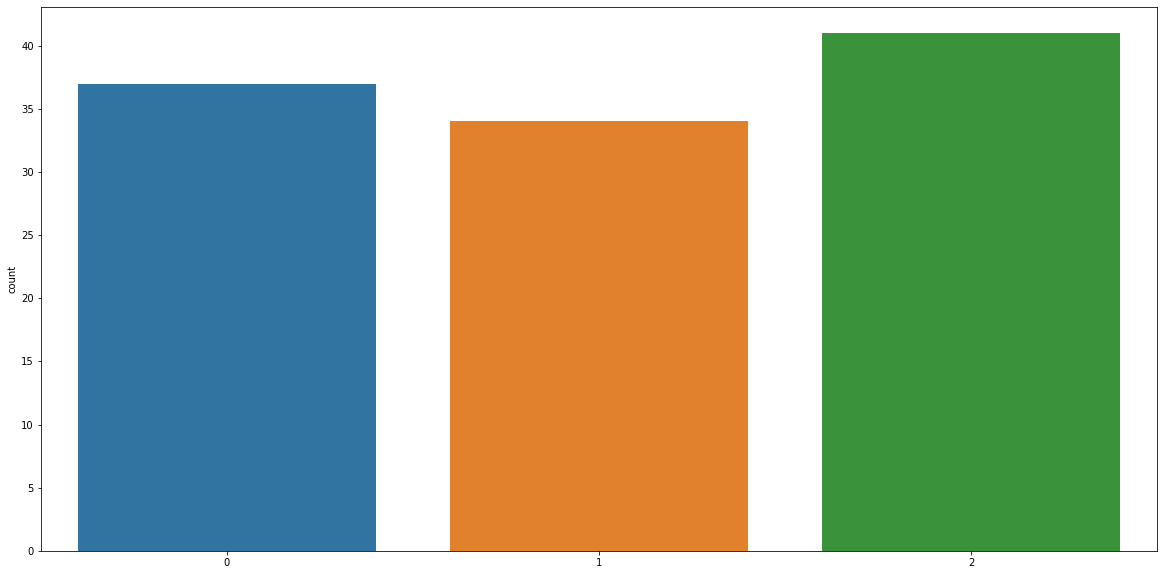

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(y_train)
plt.show()

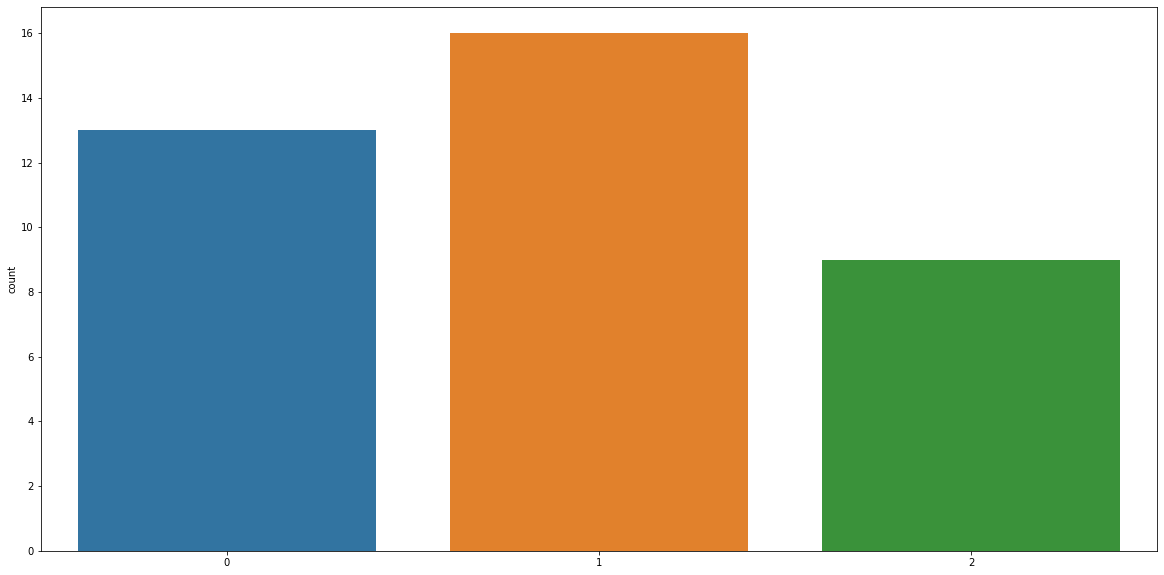

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(y_test)

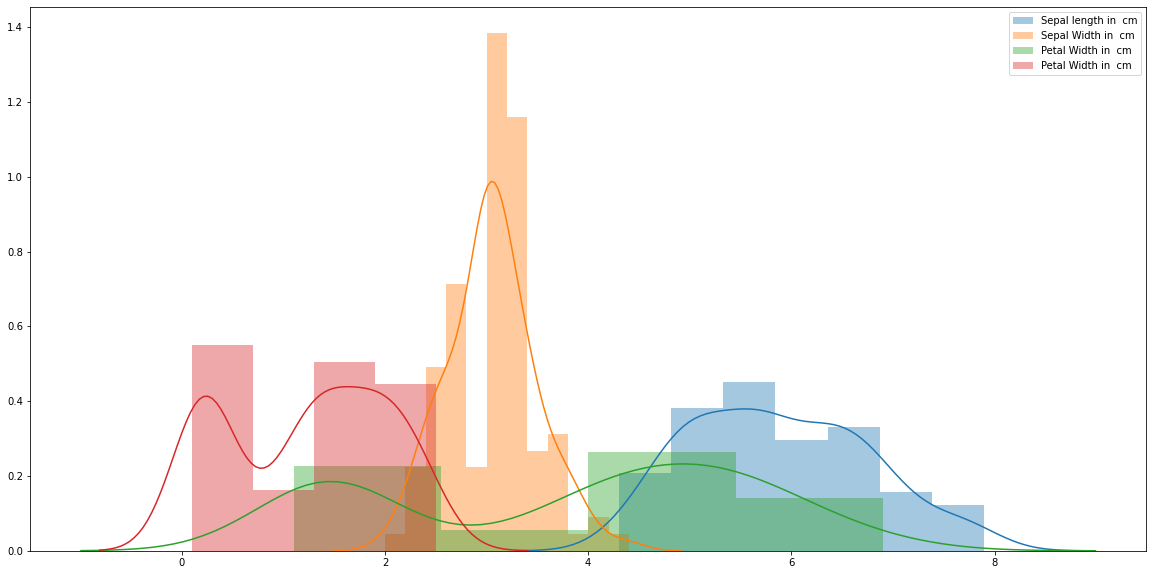

In [33]:
plt.figure(figsize=(20,10))
sns.distplot(X_train[:,0],kde=True,label="Sepal length in  cm") # Sepal Length
sns.distplot(X_train[:,1],kde=True,label="Sepal Width in  cm") # Sepal Width
sns.distplot(X_train[:,2],kde=True,label="Petal Width in  cm") # Petal Length
sns.distplot(X_train[:,3],kde=True,label="Petal Width in  cm") # Petal Width
plt.legend()

Text(0, 0.5, 'Sepal width')

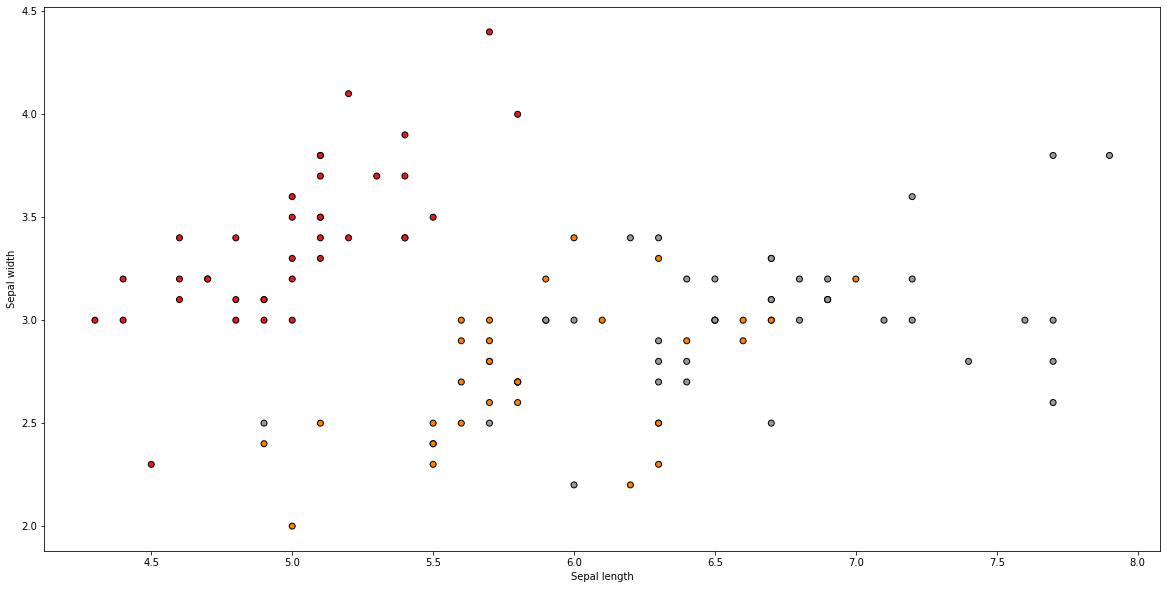

In [34]:
# Only Trainng Samples
# Plot the training points
plt.figure(figsize=(20,10))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.Set1,
           edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


Text(0, 0.5, 'Petal width')

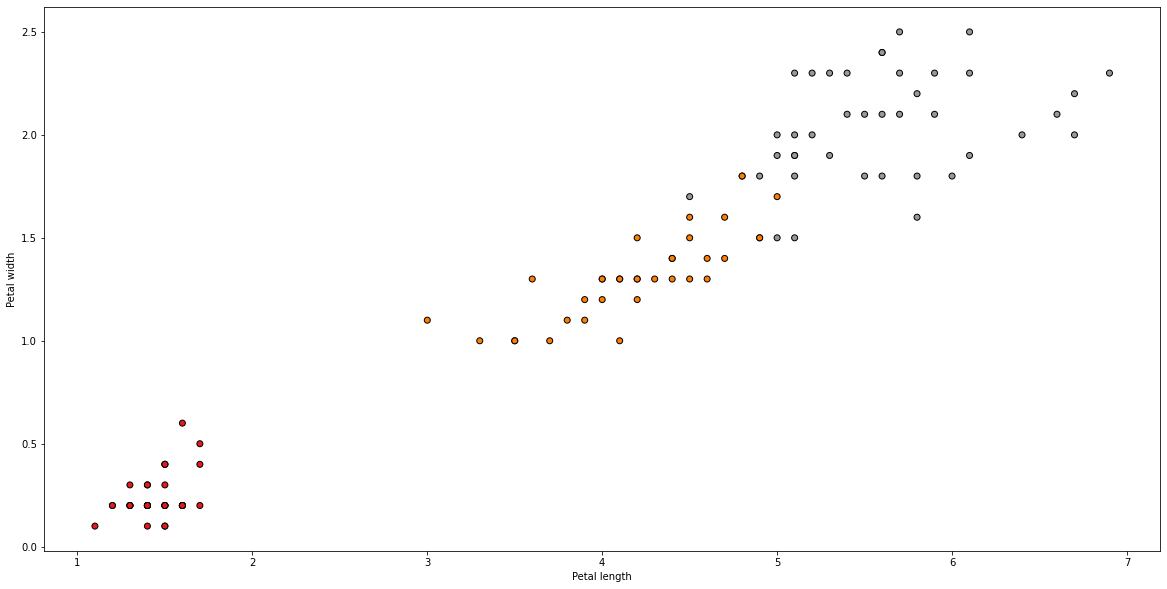

In [35]:
# Plot the training points
plt.figure(figsize=(20,10))
plt.scatter(X_train[:, 2], X_train[:, 3],c=y_train, cmap=plt.cm.Set1,
           edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

* Explore more to outside data
* Create a collect a data
* Zero thinking principle (Understand the domain, Functionality of problem,
                        Terms and Terminologies) ETL(Extract, Transform, Load)



In [36]:
X_train.shape

(112, 4)

## Quantile Transformation

In [37]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=100) 
# By Default we uniform 
X_train_transformer = quantile_transformer.fit_transform(X_train)
X_test_transformer = quantile_transformer.transform(X_test)

### Trained Data Sepal Length Before Transformation

In [38]:
np.percentile(X_train[:, 0],[0,25,50,75,100]) # Sepal Length Original Data

array([4.3, 5.1, 5.8, 6.5, 7.9])

### Tested Data Sepal Length Before Transformation

In [40]:
np.percentile(X_test[:, 0],[0,25,50,75,100]) # Sepal Length Original Data

array([4.4  , 5.125, 5.75 , 6.175, 7.3  ])

### Trained Data Sepal Length After Transformation

In [44]:
np.percentile(X_train_transformer[:, 0],[0,25,50,75,100]) # Sepal Length Original Data

array([0.        , 0.23737374, 0.51010101, 0.74242424, 1.        ])

### Tested Data Sepal Length After Transformation

In [45]:
np.percentile(X_test_transformer[:, 0],[0,25,50,75,100]) # Sepal Length Original Data

array([0.01010101, 0.24873737, 0.47979798, 0.6031941 , 0.94144144])

## output_distribution

In [47]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=100,output_distribution='normal') 
# By Default we uniform 
X_train_transformer = quantile_transformer.fit_transform(X_train)
X_test_transformer = quantile_transformer.transform(X_test)

In [48]:
np.percentile(X_train[:, 0],[0,25,50,75,100]) # Sepal Length Original Data

array([4.3, 5.1, 5.8, 6.5, 7.9])

This feature corresponds to the sepal length in cm. Once the quantile transformation applied,
those landmarks approach closely the percentiles previously defined:

In [49]:
np.percentile(X_train_transformer[:, 0],[0,25,50,75,100]) # Sepal Length Original Data

array([-5.19933758, -0.71477599,  0.02532218,  0.65083731,  5.19933758])

### Power Transformation

#### Power trasnformation can be applied  only in positive skweing

Johnson is the default transformation under power

In [52]:
PT_Johnson = preprocessing.PowerTransformer() # By Default we have this  method Yeo-johnson

In [53]:
PT_Johnson.method

'yeo-johnson'

In [54]:
PT_Box_cox = preprocessing.PowerTransformer(method="box-cox") # I am changing my method from Johnson to box_cox

In [55]:
PT_Box_cox.method

'box-cox'

In [56]:
rng = np.random.RandomState(304)

In [57]:
# n_quantiles is set to the training set size rather than the default value

QT_normal = preprocessing.QuantileTransformer(n_quantiles=500,
                                             output_distribution='normal',
                                             random_state=rng)

In [58]:
QT_normal.n_quantiles

500

In [93]:
N_SAMPLES = 1000
FONT_SIZE = 8
BINS = 30

In [94]:
size = (N_SAMPLES,1)

In [95]:
x_lognormal = rng.lognormal(size=size) # lognormal distribution

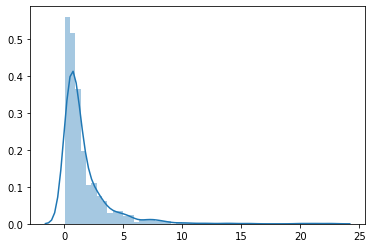

In [96]:
sns.distplot(x_lognormal)

In [97]:
df = 3
X_chisq = rng.chisquare(df=df,size=size) # Chiquare distribution

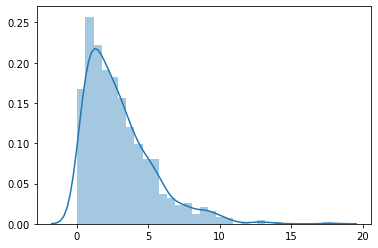

In [98]:
sns.distplot(X_chisq)

In [99]:
a = 50
X_weibull = rng.weibull(a=a,size=size) # weibull distribution

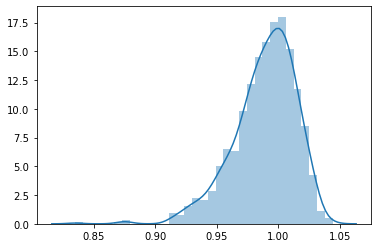

In [100]:
sns.distplot(X_weibull)

In [101]:
# Gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

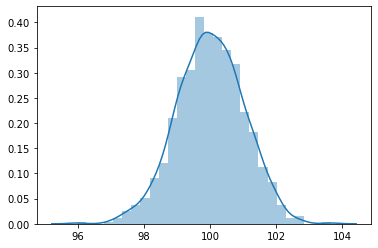

In [102]:
sns.distplot(X_gaussian)

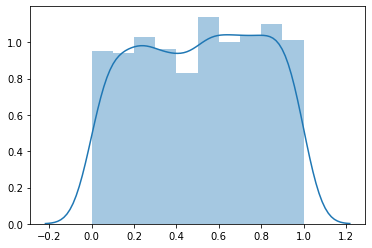

In [103]:
# Uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)
sns.distplot(X_uniform)

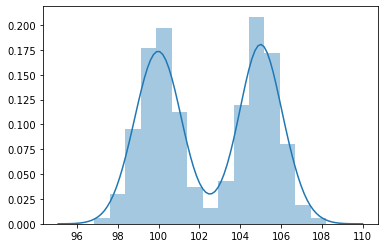

In [104]:
# Binomial distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)
sns.distplot(X_bimodal)

In [105]:
# Create plots
distributions = [
    ('Lognormal', x_lognormal),
    ('Chi-Squared', X_chisq),
    ('Weibull', X_weibull),
    ('Gaussian', X_gaussian),
    ('Uniform', X_uniform),
    ('Bimodal', X_bimodal)
]

colors = ['#D81B60','#0188FF','#FFC107',
         '#B7A2FF','#000000','#2EC5AC']

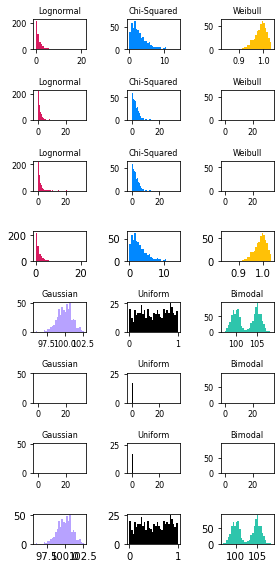

In [118]:
fig,axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [(0, 3, 6, 9), (1, 4, 7, 10), (2, 5, 8, 11), (12, 15, 18, 21),
            (13, 16, 19, 22), (14, 17, 20, 23)]
axes_list = [(axes[i], axes[j], axes[k], axes[l])
            for (i, j, k, l) in axes_idxs]

for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=.5)
    
    # Perform power transform and quantile transform
    X_trans_bc = PT_Box_cox.fit(X_train).transform(X_test)
    lmbda_bc = round(PT_Box_cox.lambdas_[0], 2)
    
    X_trans_yj = PT_Johnson.fit(X_train).transform(X_test)
    lmbda_yj = round(PT_Johnson.lambdas_[0], 2)
    
    # Peform power transform
    X_trans_qt = QT_normal.fit(X_train).transform(X_test)
    
    ax_original, ax_bc, ax_yj, ax_qt = axes 
    ax_original.hist(X_train, color=color, bins=BINS) 
    ax_original.set_title(name, fontsize=FONT_SIZE) 
    ax_original.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
    
    for ax, X_trans,meth_name, lmbda in zip((ax_bc, ax_yj, ax_qt),
                  (X_trans_bc, X_trans_yj, X_trans_qt),
                  ('Box-cox', 'Yeo-Johnson', 'Quantile transform'),
                  (lmbda_bc, lmbda_yj,None)):
        ax.hist(X_train, color=color, bins=BINS)
        title = "After {}".format(meth_name)
        if lmbda is not None:
            title += r'\n$\lambda$ = {}'.format(lmbda)
            ax.set_title(name, fontsize=FONT_SIZE)
            ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
            ax.set_xlim([-3.5,35])
plt.tight_layout()
plt.show()
            
    